In [ ]:
#%pip install mlxtend --upgrade

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import csv
import time
import sklearn.utils

In [ ]:
with open('chess.csv') as f:
    reader = csv.reader(f)
    my_list = list(reader)
#print("csv to list:",my_list)

In [ ]:
te = TransactionEncoder()
array = te.fit(my_list).transform(my_list)
df = pd.DataFrame(array, columns=te.columns_)
df.shape

(3196, 75)

In [ ]:

fptime = []
aptime = []
th = []
i = 500

while i<df.shape[0]:
  df = sklearn.utils.shuffle(df)
  row =df.head(i)
  start_time = time.time()
  frequent = fpgrowth(row, min_support=0.7)
  end = time.time() - start_time
  fptime.append(end)

  start_time = time.time()
  apfrequent = apriori(row, min_support=0.7)
  end = time.time() - start_time
  aptime.append(end)
  th.append(i)
  i = i + 500

In [ ]:
print("Time",fptime)
print("Threshold",th)

Time [0.8664636611938477, 0.811211347579956, 0.8615632057189941, 1.0328764915466309, 1.0758275985717773, 1.1901612281799316]
Threshold [500, 1000, 1500, 2000, 2500, 3000]


In [ ]:
print("Time",aptime)
print("Threshold",th)

Time [1.461756944656372, 1.9781279563903809, 3.074082136154175, 3.512052297592163, 4.04788613319397, 4.663878679275513]
Threshold [500, 1000, 1500, 2000, 2500, 3000]


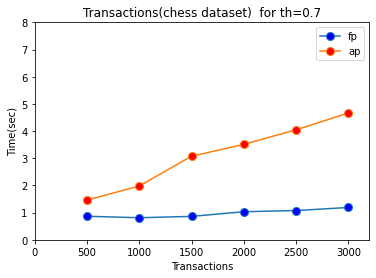

In [ ]:
import matplotlib.pyplot as plt

plt.plot(th, fptime,marker='o', markerfacecolor='blue', markersize=8,  label = "fp")
plt.plot(th, aptime,marker='o', markerfacecolor='red', markersize=8,  label = "ap")
plt.ylim(0,8)
plt.xlim(0,3200)
plt.xlabel('Transactions')
plt.ylabel('Time(sec)')
plt.legend()
plt.title('Transactions(chess dataset)  for th=0.7')

plt.show()